# Goal: For the given marketing dataset, predict whether the customer will subscribe or not for a term deposit (yes/no)

What is a term deposit?
A term deposit is like a fixed deposit where consumer invest their money for a fixed time for fixed interest rate.

# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option ('display.max_rows', 50)

In [4]:
data=pd.read_csv("D:\DATA\Classification(Customer_Campaign)\Customer_Campaign.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
len(data)

45211

In [6]:
len(data.columns)

17

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# count of entries from categorical  feature
print(data["job"].value_counts())
print(data["marital"].value_counts())
print(data["education"].value_counts())
print(data["default"].value_counts())
print(data["housing"].value_counts())
print(data["loan"].value_counts())
print(data["contact"].value_counts())
print(data["month"].value_counts())
print(data["poutcome"].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [6]:
for column in data.columns:
    print(column,data[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


Conclusion: 
     unique values from features

Conclusion:
Predictors:

age | int64 | age in years
job | object | type of job (categorical:blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown)
marital | object | marital status (categorical: married,single,divorced)
education | Object | education background (categorical: secondary,tertiary,primary,unknown)
default | Object | has credit in default? (categorical: no,yes)
balance | int64 | Balance of the individual
housing | object | has housing loan? (categorical: yes,no)
loan | object | has personal loan? (categorical: no,yes)
contact | object | contact communication type (categorical:unknown,cellular,telephone)
day | int64 | last contact day of the week (categorical:mon,tue,wed,thu,fri)
month | object | last contact month of year (categorical: may,jun,jul,aug,oct,nov,dec,jan,feb,mar,apr,sep)
duration | int64 | last contact duration, in seconds (numeric)
campaign | int64 | number of contacts performed during this campaign and for this client
pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous | int64 | number of contacts performed before this campaign and for this client
poutcome | object | outcome of the previous marketing campaign (categorical:unknown,other,failure,success

Prediction:
deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

# Find Missing Values

In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Conclusion: No missing values

# Visualization of Categorical Features

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
cat_features=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome']

In [13]:
for i in enumerate(cat_features):
    print(i)
 

(0, 'job')
(1, 'marital')
(2, 'education')
(3, 'default')
(4, 'housing')
(5, 'loan')
(6, 'contact')
(7, 'month')
(8, 'poutcome')


In [22]:
  for i in enumerate(cat_features):
        print(i[0])

0
1
2
3
4
5
6
7
8


C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\li

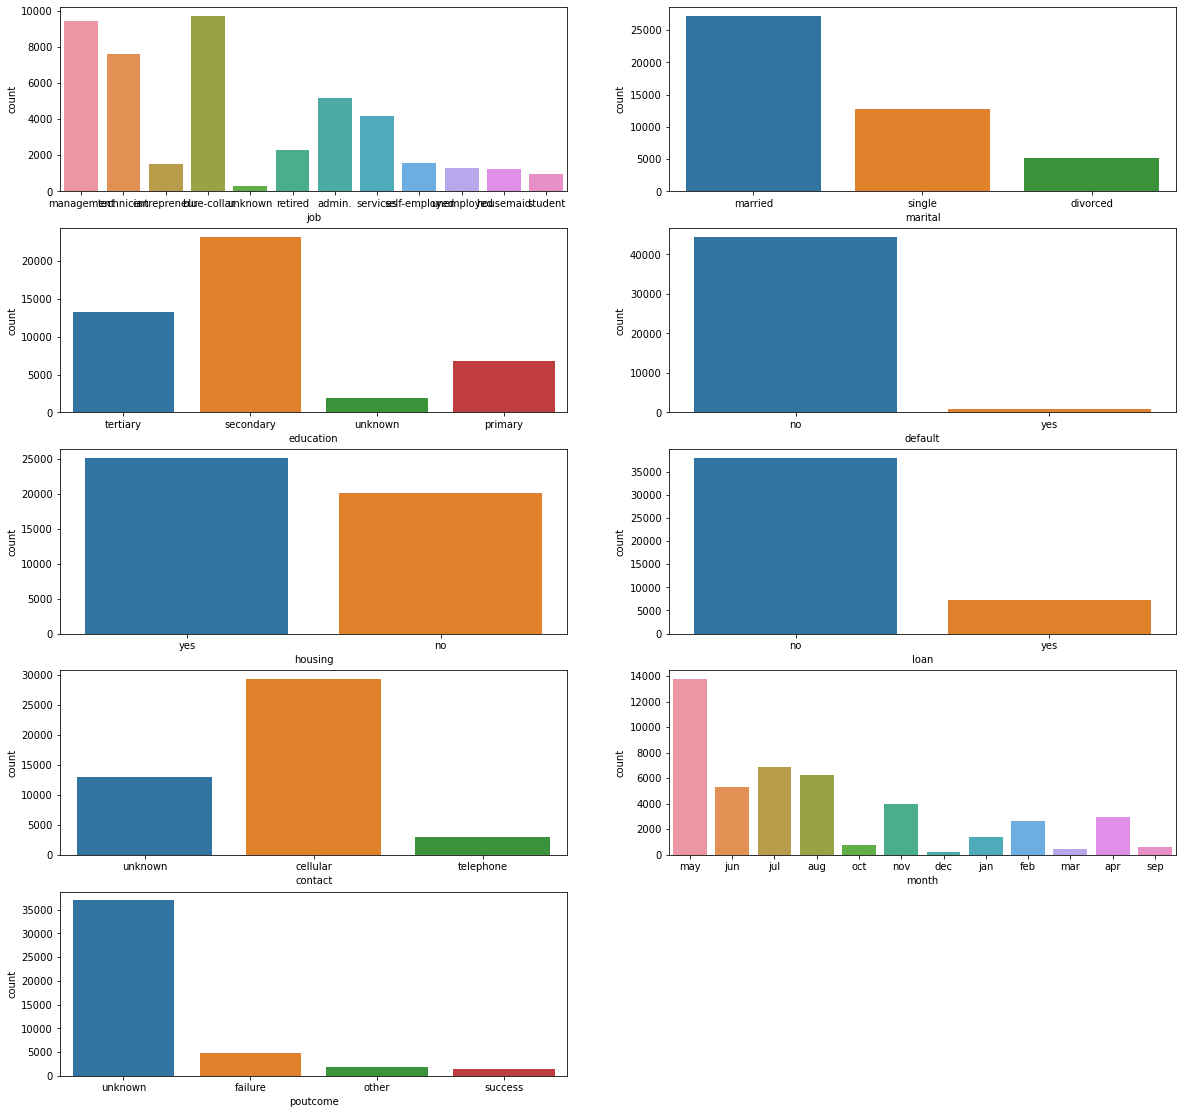

In [13]:
#Distribution of categorical fetaures
plt.figure(figsize=(20,40))
for i in enumerate(cat_features):
    plt.subplot(10,2,i[0]+1)
    sns.countplot(i[1],data=data)

Conclusion:
1) client with job type as management and blue collar records are high in dataset and students and housemaid are very less.
2) count of married are less and count of divorced are less.
3) client whoes education background is secondary are in high numbers in given dataset.
4) defualt feature  has value of no at high ratio to value of yes.
5) Most of the clients are contacted via cellular contact.
6) Most of the clients has housing and most of the clients has not taken loan.
5) data in month of may is high and less in dec

C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\li

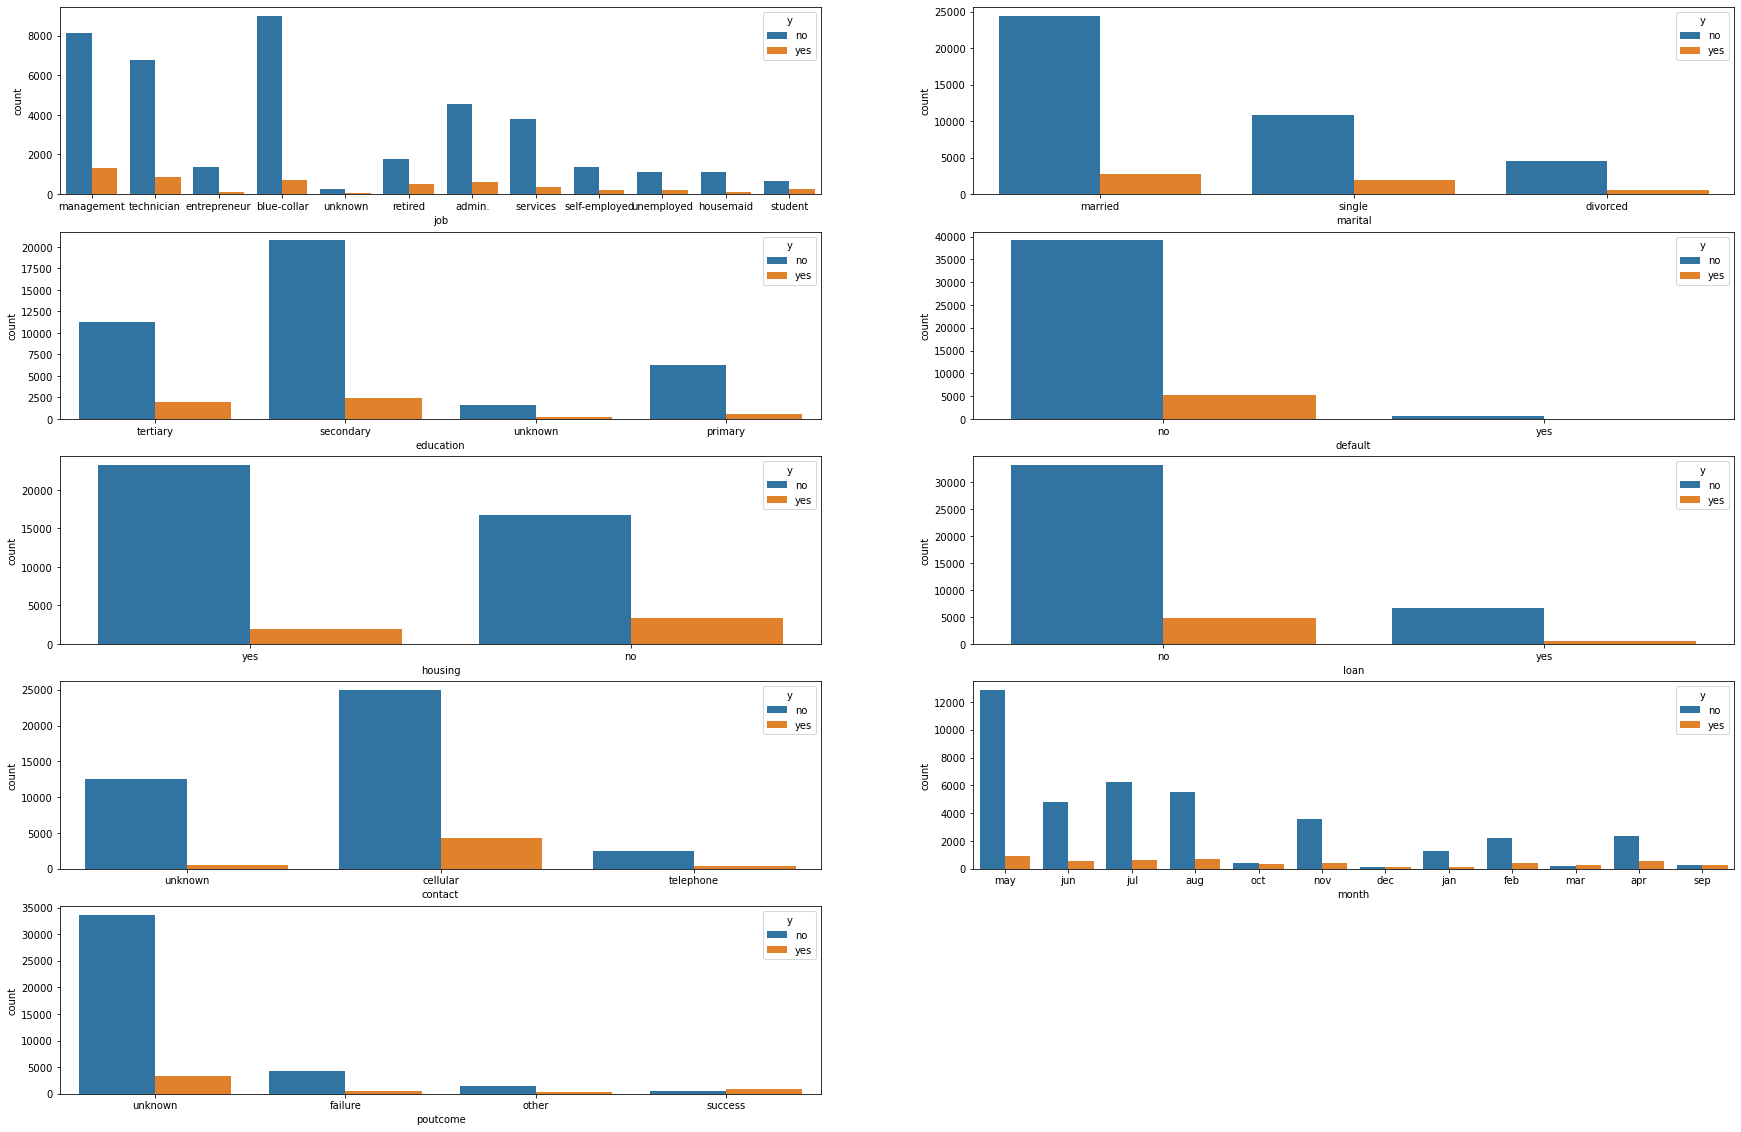

In [14]:
# all categorical faetures with respect to output label
plt.figure(figsize=(30,20))
for i in enumerate(cat_features):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(i[1],hue="y",data=data)

Conclusion:
    1) The clients who suscribed yes, are more from management,technician,blue-collar,admin and retired type of job groups.
    2) Percentenge-wise retrire category has shown more interest.
    3) In the months of may,jun,jul,aug,oct,nov and feb client has taken interest.
    4) In poutcomes feature,success category has shown highest count percentage-wise.

# Visualization of continous numerical features

In [15]:
data.columns
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
con_features=['age','balance','day','duration', 'campaign', 'pdays', 'previous']

In [17]:
list(enumerate(con_features))

[(0, 'age'),
 (1, 'balance'),
 (2, 'day'),
 (3, 'duration'),
 (4, 'campaign'),
 (5, 'pdays'),
 (6, 'previous')]

C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

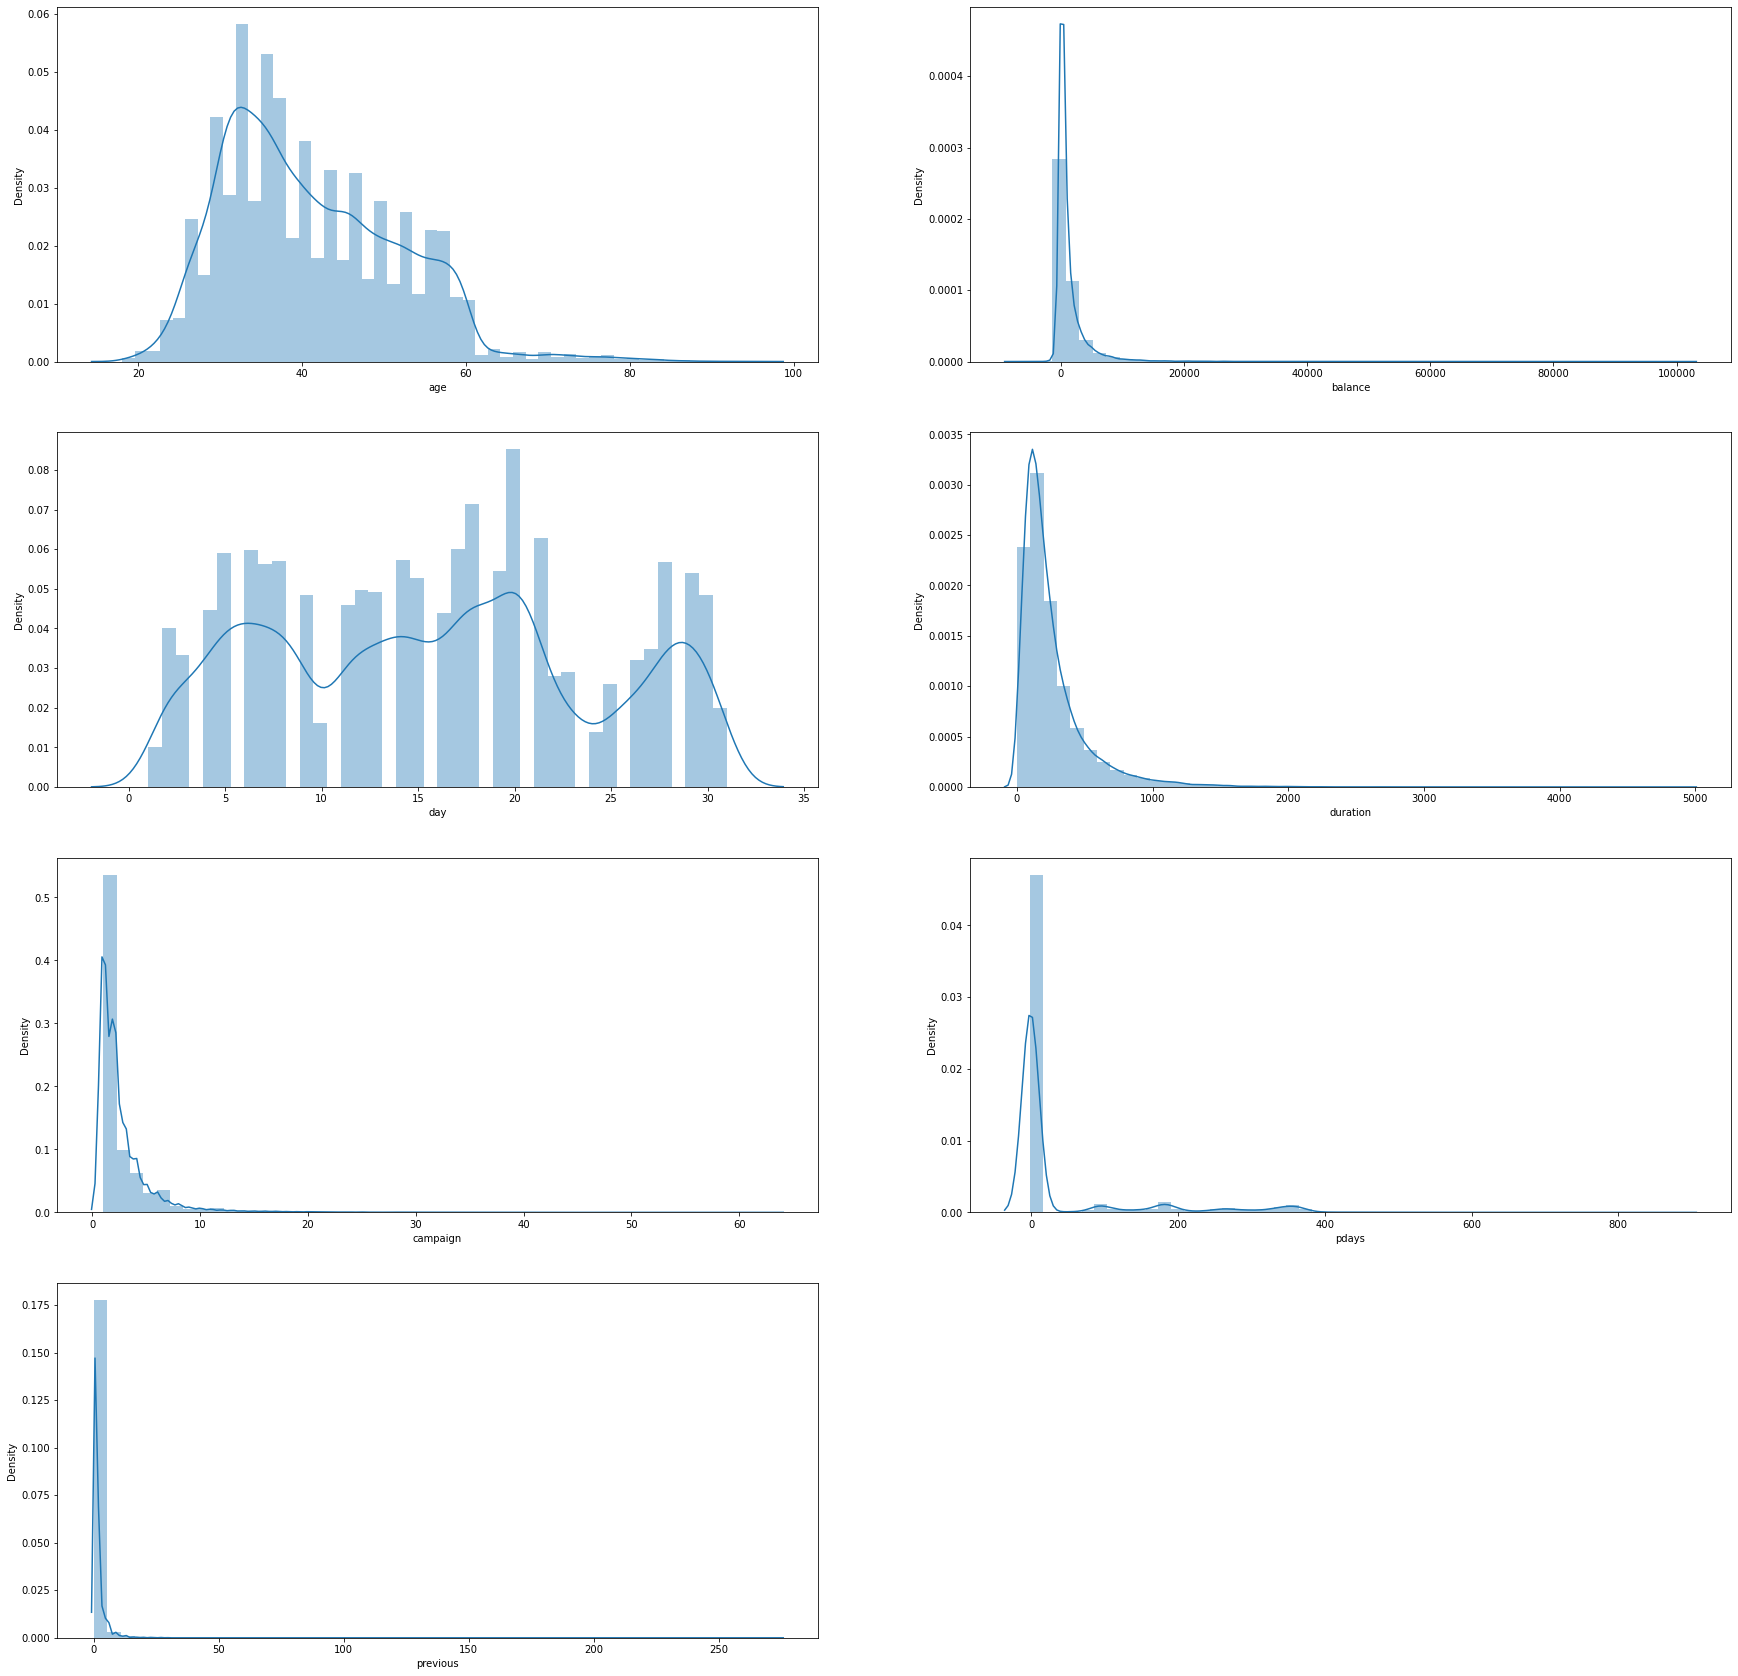

In [18]:
plt.figure(figsize=(30,30))
for i in enumerate(con_features):
    plt.subplot(4,2,i[0]+1)
    sns.distplot(data[i[1]])
    plt.xlabel(i[1])

Conclusion:
    1) Only age feature is normally distributed, all other features are heavily skewed.
    

# Checking of outliers


C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAYALI\anaconda3\li

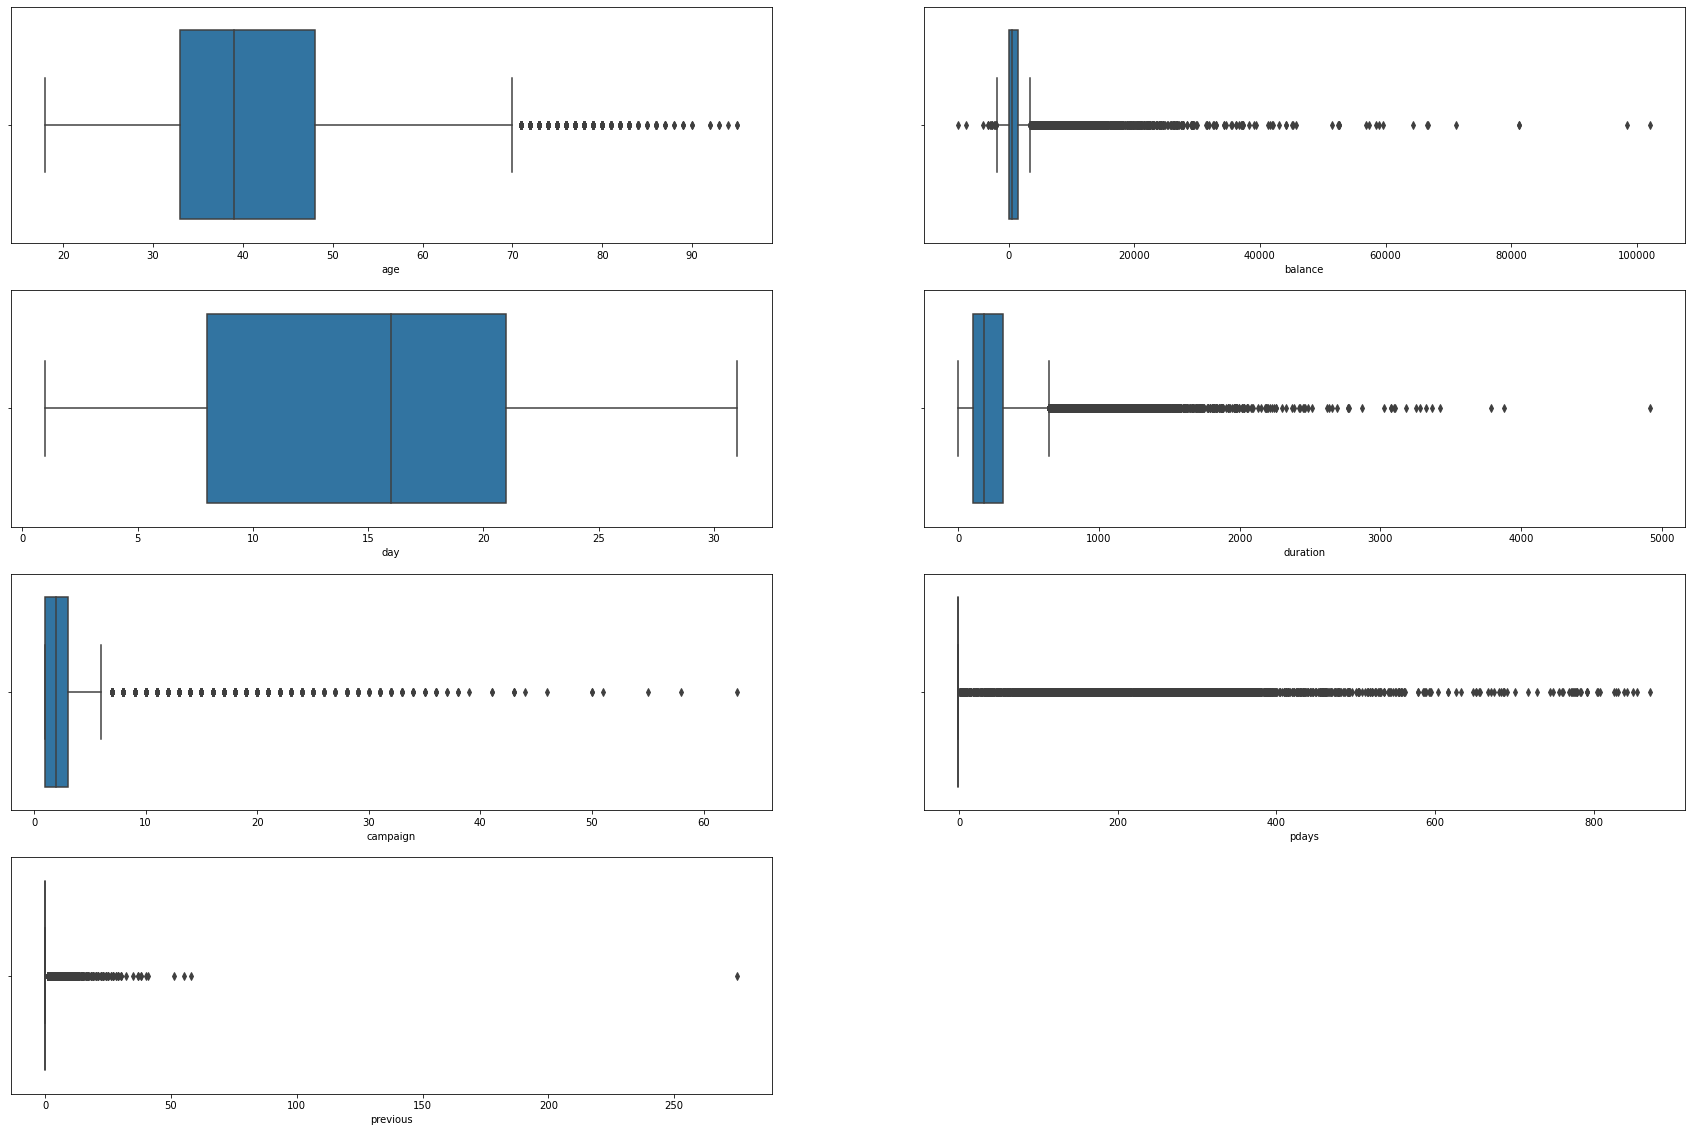

In [19]:
plt.figure(figsize=(30,20))
for i in enumerate(con_features):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xlabel(i[1])

Conclusion:
    Except day feature all other features has outliers in datasets.

# Correlation Matrix

<AxesSubplot:>

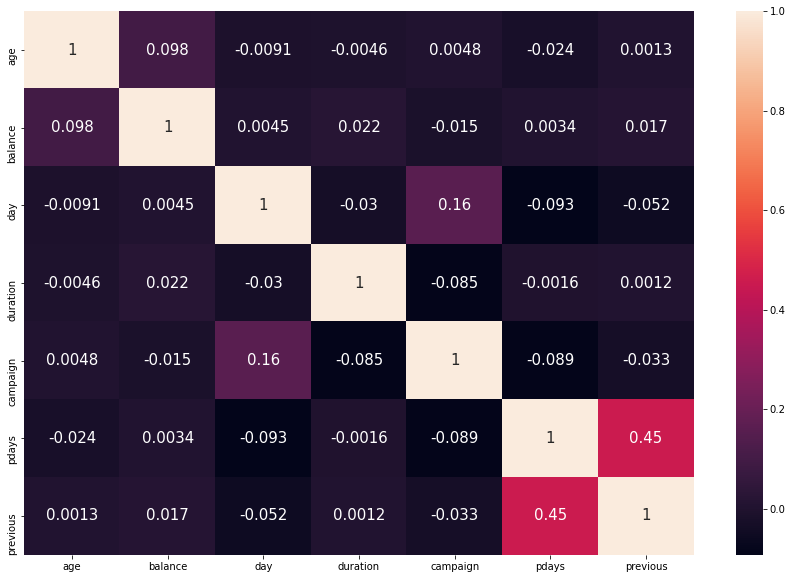

In [20]:
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={"size":15})

Conclusion:
    We can say, Data does not have collinarity problem

# Visulaization of labelled feature

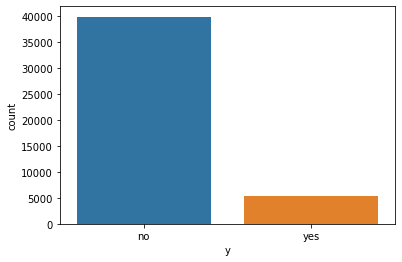

In [21]:
sns.countplot(x='y',data=data)
plt.show()

In [22]:
data["y"].groupby(data["y"]).count()

y
no     39922
yes     5289
Name: y, dtype: int64

 Data is imbalnaced ,So we have to perform undersampling or oversampling

# Data Preprocessing:

In [23]:
Data=data.copy()

In [24]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
print(data["pdays"].value_counts())

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 186       60
 189       60
 174       57
 349       57
 96        57
 363       55
 90        54
 97        54
 196       51
 365       51
 342       49
 98        49
 357       49
 368       49
 351       48
 345       48
 347       47
 178       47
 367       47
 190       46
 180       45
 195       45
 99        45
 104       45
 356       45
 344       44
 172       44
 371       44
 170       43
 87        43
 179       43
 150       43
 187       43
 169       42
 167       42
 176       42
 105       42
 352       40
 355       40
 360       38
 2         37
 272       37
 168       37
 336       36
 359       36
 265       35
 102       35
 346       35
 358       35
 173       34
 171       34
 369       33
 113       33
 330       33
 361  

Conclusion:
    most of the values are negative so we can drop Pdays feature 

In [27]:
Data.drop(['pdays'],axis=1, inplace=True)

In [28]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Remove Outliers

In [29]:
data.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18        5
     19       24
     20       35
     21       57
     22       89
     23      158
     24      234
     25      414
     26      671
     27      768
     28      876
     29     1014
     30     1540
     31     1790
     32     1864
     33     1762
     34     1732
     35     1685
     36     1611
     37     1526
     38     1322
     39     1344
     40     1239
     41     1171
     42     1131
     43     1058
     44     1043
     45     1110
     46     1057
     47      975
     48      915
     49      893
     50      867
     51      859
     52      826
     53      806
     54      727
     55      730
     56      710
     57      750
     58      668
     59      682
     60      498
     61       90
     62       41
     63       47
     64       39
     65       38
     66       39
     67       31
     68       15
     69       27
     70       50
     71       29
     72       28
     73       20
     74       24
     75       24
     

Values are lies between 18 to 95 , so we can ignore this feature from the list of outliers

In [30]:
data.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019         1
     -6847         1
     -4057         1
     -3372         1
     -3313         1
     -2827         1
     -2712         1
     -2604         1
     -2282         1
     -2122         1
     -2093         1
     -2082         1
     -2049         1
     -1980         1
     -1968         1
     -1965         1
     -1941         1
     -1884         2
     -1882         1
     -1854         1
     -1818         1
     -1781         1
     -1779         1
     -1746         1
     -1737         1
     -1730         1
     -1725         1
     -1701         1
     -1680         1
     -1668         1
     -1664         1
     -1661         1
     -1655         1
     -1636         1
     -1629         1
     -1621         2
     -1613         1
     -1601         1
     -1598         1
     -1586         1
     -1547         1
     -1545         1
     -1531         1
     -1500         1
     -1493         1
     -1490         1
     -1489         1


We can see too much variation but values are negative for no label

In [31]:
data.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0             3
     1             2
     2             3
     3             4
     4            15
     5            35
     6            45
     7            73
     8            84
     9            77
     10           76
     11           96
     12           80
     13           88
     14           84
     15           85
     16           88
     17           81
     18           94
     19           71
     20           83
     21           79
     22           87
     23           76
     24           80
     25           78
     26           70
     27           71
     28           55
     29           80
     30           62
     31           57
     32           54
     33           57
     34           72
     35           66
     36           90
     37           77
     38           62
     39           75
     40           72
     41           89
     42           86
     43           96
     44           95
     45           82
     46           83

A duration goes high clients has shown interest in term deposit

In [32]:
data.groupby(['y','campaign'],sort=True)['campaign'].count()


y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

In [33]:
Data1= Data[Data['campaign'] < 46]

In [34]:
Data1.groupby([data["y"],'previous'],sort=True)['previous'].count()


y    previous
no   0           33563
     1            2189
     2            1650
     3             848
     4             543
     5             338
     6             194
     7             151
     8              90
     9              68
     10             41
     11             50
     12             34
     13             29
     14             14
     15             19
     16             13
     17             12
     18              6
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            3384
     1             583
     2             456
     3             2

In [35]:
Data2= Data1[Data1['previous'] < 32]

In [36]:
Data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
Data2["housing"]=Label_Encoder.fit_transform(Data2["housing"])
Data2["loan"]=Label_Encoder.fit_transform(Data2["loan"])
Data2["y"]=Label_Encoder.fit_transform(Data2["y"])
Data2["default"]=Label_Encoder.fit_transform(Data2["default"])

<ipython-input-37-0dcce3bc0ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2["housing"]=Label_Encoder.fit_transform(Data2["housing"])
<ipython-input-37-0dcce3bc0ba1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2["loan"]=Label_Encoder.fit_transform(Data2["loan"])
<ipython-input-37-0dcce3bc0ba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [38]:
Data2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,unknown,0


In [39]:
Data2=pd.get_dummies(Data2,columns=["job"])
Data2=pd.get_dummies(Data2,columns=["marital"])
Data2=pd.get_dummies(Data2,columns=["education"])
Data2=pd.get_dummies(Data2,columns=["contact"])
Data2=pd.get_dummies(Data2,columns=["month"])
Data2=pd.get_dummies(Data2,columns=["poutcome"])

In [112]:
Data2.head()

,age,balance,housing,loan,day,duration,campaign,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,1,0,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,1,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,1,0,5,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,0,0,5,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


I have applied label-encoding to the features who has factor level of two and for the features who has factor level is more than 2,I have created dummay variables.


# Data Spliting into Input and output label

In [40]:
Data3=Data2.drop(['y'],axis=1, inplace=False)


In [41]:
Data3.head()

,age,default,balance,housing,loan,day,duration,campaign,previous,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [42]:
Data3.shape

(45192, 47)

In [43]:
import imblearn
print(imblearn.__version__)

0.8.0


Output label is imbalanced so we will do balancing operation(under-sampling)

In [44]:
from imblearn.under_sampling import NearMiss

In [45]:
nm=NearMiss(version=1)
X,Y=nm.fit_resample(Data3,Data2["y"])

In [46]:
Data3.shape

(45192, 47)

In [47]:
X.shape

(10574, 47)

In [48]:
Y.groupby(Y).count()

y
0    5287
1    5287
Name: y, dtype: int64

# Split the Data

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier = LogisticRegression(random_state = 0)

In [52]:
classifier.fit(x_train, y_train)

C:\Users\SAYALI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [53]:
y_predict=classifier.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8664901664145235

Feature Importance

Feature: 0, Score: -0.00539
Feature: 1, Score: -0.00134
Feature: 2, Score: 0.00268
Feature: 3, Score: -1.19463
Feature: 4, Score: -0.30705
Feature: 5, Score: -0.00707
Feature: 6, Score: 0.00689
Feature: 7, Score: -0.13616
Feature: 8, Score: 0.17220
Feature: 9, Score: -0.02444
Feature: 10, Score: -0.51222
Feature: 11, Score: -0.07726
Feature: 12, Score: -0.02504
Feature: 13, Score: -0.10995
Feature: 14, Score: 0.35279
Feature: 15, Score: -0.04359
Feature: 16, Score: -0.18980
Feature: 17, Score: 0.12625
Feature: 18, Score: -0.12519
Feature: 19, Score: -0.01398
Feature: 20, Score: 0.00327
Feature: 21, Score: 0.03124
Feature: 22, Score: -0.44601
Feature: 23, Score: -0.22439
Feature: 24, Score: -0.11288
Feature: 25, Score: -0.50865
Feature: 26, Score: -0.03447
Feature: 27, Score: 0.01685
Feature: 28, Score: -0.04974
Feature: 29, Score: 0.11375
Feature: 30, Score: -0.70316
Feature: 31, Score: 0.14771
Feature: 32, Score: -0.10303
Feature: 33, Score: 0.05181
Feature: 34, Score: 0.02121
Feature

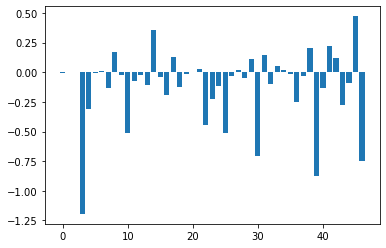

In [55]:
import matplotlib.pyplot as pyplot
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree

In [56]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy')

In [59]:
classifier1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy')

In [60]:
y_pred1=classifier1.predict(x_test1)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8736762481089259

# Naïve Bayes

In [62]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
classifier2=GaussianNB()

In [65]:
classifier2.fit(x_test2,y_test2)

GaussianNB()

In [66]:
y_pred2=classifier2.predict(x_test2)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8260211800302572

# K-Nearest Neighbours

In [68]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
classifier3=KNeighborsClassifier(n_neighbors=158)

In [71]:
classifier3.fit(x_train3,y_train3)

KNeighborsClassifier(n_neighbors=158)

In [72]:
y_pred3=classifier3.predict(x_test3)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8551437216338881

# Support Vector Machine

In [74]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [75]:
from sklearn.svm import SVC

In [76]:
classifier4=SVC()

In [77]:
classifier4.fit(x_train4,y_train4)

SVC()

In [78]:
y_pred4=classifier4.predict(x_test4)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8400151285930408

# Random Forest

In [80]:
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5 = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
classifier5 =RandomForestClassifier(n_estimators=10,criterion="entropy") 

In [83]:
classifier5.fit(x_train5,y_train5)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:
y_pred5=classifier5.predict(x_test5)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.9024205748865356

Feature Importance

Feature: 0, Score: 0.07439
Feature: 1, Score: 0.00293
Feature: 2, Score: 0.23004
Feature: 3, Score: 0.02871
Feature: 4, Score: 0.00955
Feature: 5, Score: 0.06270
Feature: 6, Score: 0.24980
Feature: 7, Score: 0.02639
Feature: 8, Score: 0.01902
Feature: 9, Score: 0.00662
Feature: 10, Score: 0.00894
Feature: 11, Score: 0.00262
Feature: 12, Score: 0.00218
Feature: 13, Score: 0.00705
Feature: 14, Score: 0.00657
Feature: 15, Score: 0.00213
Feature: 16, Score: 0.00563
Feature: 17, Score: 0.00580
Feature: 18, Score: 0.00774
Feature: 19, Score: 0.00343
Feature: 20, Score: 0.00049
Feature: 21, Score: 0.00493
Feature: 22, Score: 0.00822
Feature: 23, Score: 0.00851
Feature: 24, Score: 0.00495
Feature: 25, Score: 0.00827
Feature: 26, Score: 0.00847
Feature: 27, Score: 0.00265
Feature: 28, Score: 0.01125
Feature: 29, Score: 0.00271
Feature: 30, Score: 0.01417
Feature: 31, Score: 0.00887
Feature: 32, Score: 0.00924
Feature: 33, Score: 0.00142
Feature: 34, Score: 0.00680
Feature: 35, Score: 0.00284
Fe

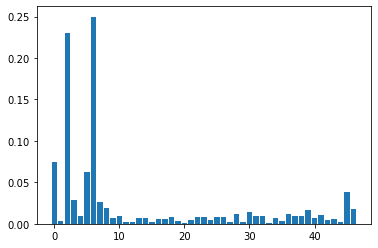

In [87]:
import matplotlib.pyplot as pyplot
importance = classifier5.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Conclusion:
    1) From above methods, random forest has gievn almost 90 % accuracy, 
    so I can consider those algorithm for the deployment.
    2) By looking into feature imporatance, we can conclude balance and duration features are important for analysis.
    

# References:
    1) DATA: https://archive.ics.uci.edu/ml/datasets/bank+marketing
    2) Feature importance :https://machinelearningmastery.com/calculate-feature-importance-with-python/